# Лабораторная работа №1 - Изучение и предобработка данных

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler, RobustScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

## 1. Изучение набора данных iris.csv с использованием Pandas и Seaborn

### 1.1. Загрузить данные из файла как Pandas DataFrame.

In [27]:
df = pd.read_csv("iris.csv")
df.drop("Unnamed: 0", axis=1, inplace=True)

### 1.2. Вызвав  у датафрейма метод head, проверить корректность загруженных данных.

In [28]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### 1.3. Вызвав  у датафрейма метод describe, получить характеристики. Опишите полученный результат.

In [29]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


Была выведена информация о данных. Выведено количество непропущенных значений в столбце, среднее значение, среднее квадратичное отклонение, минимальное значение, 0.25 - квантиль (нижний квартиль), 0.50 - квантиль (медиана), 0.75 - квантиль (верхний квартиль), максимальное значение.

### 1.4. Видоизмените полученный датафрейм таким образом, чтобы метка классов были следующими: 0 - Iris-setosa, 1 - Iris-versicolor, 2 - Iris-virginica. Сохраните полученный датафрейм в отдельный файл формата csv.

In [30]:
df.replace(
    {"target":
     {0: "Iris-setosa",
      1: "Iris-versicolor",
      2: "Iris-virginica"}},
     inplace=True)
df.to_csv("new_iris.csv", index=False)

In [31]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### 1.5. Визуально оцените набор данных, построив изображение, содержащее графики ядерной оценки плотности каждого признака, диаграмму рассеяния и двумерную ядерную оценку плотности для каждых признаков. Наблюдения разных классов должны быть выделены отдельным цветом (рекомендуемая палитра ‘tab10’ или ‘Set1’). Пример построения: https://seaborn.pydata.org/examples/pair_grid_with_kde.html . Опишите полученный график, что на нем изображено, какие выводы о данных можно сделать.


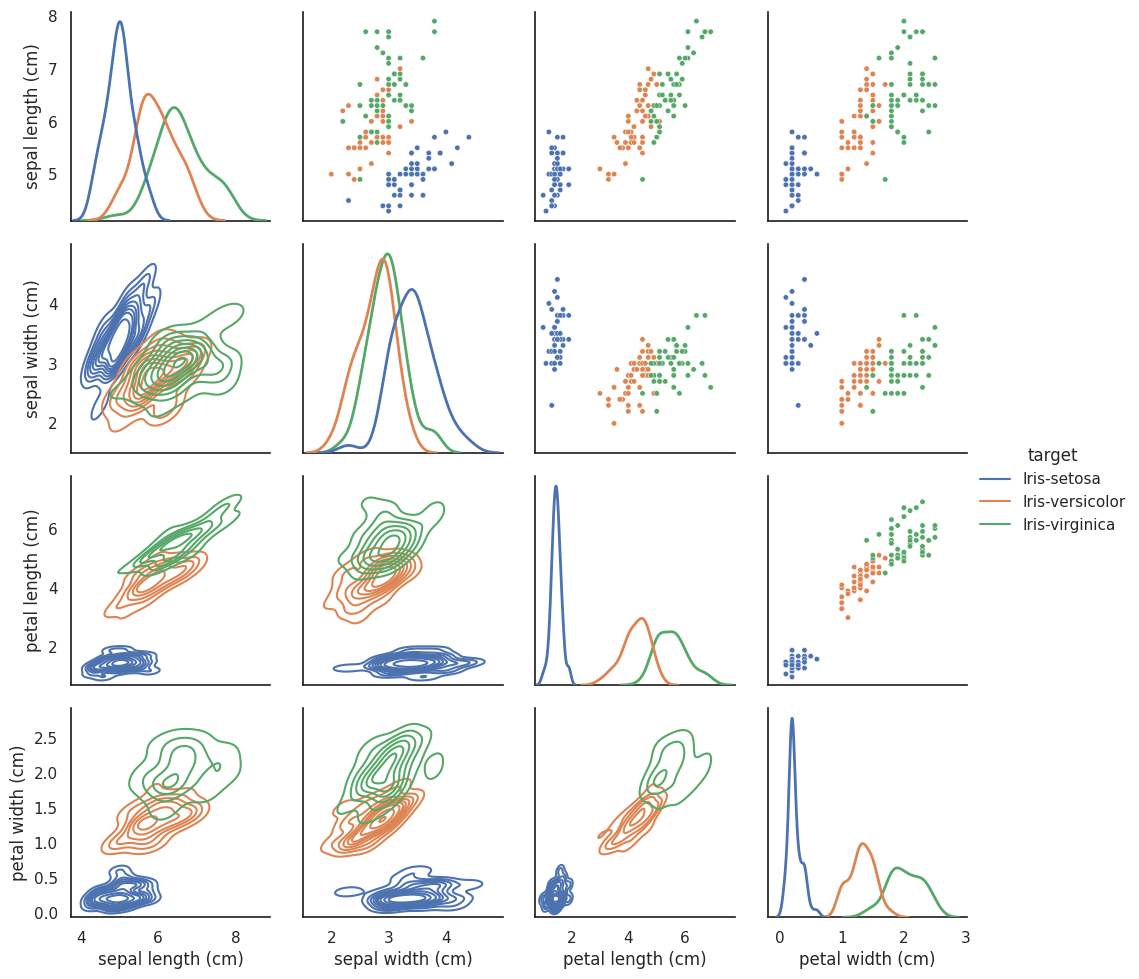

In [32]:
sns.set_theme(style="white")
sns.color_palette("Set1")

g = sns.PairGrid(df, diag_sharey=False, hue="target")
g.map_upper(sns.scatterplot, s=15)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot, lw=2)
g.add_legend()

### 1.6. На одном изображении постройте гистограммы распределения для каждого признака.

#### 1.6.1. Постройте гистограммы для разного количества столбцов: 5, 10, 15, 20, 30. Выберите на ваш взгляд такое количество столбцов, который лучшие образом описывает форму распределения признаков.

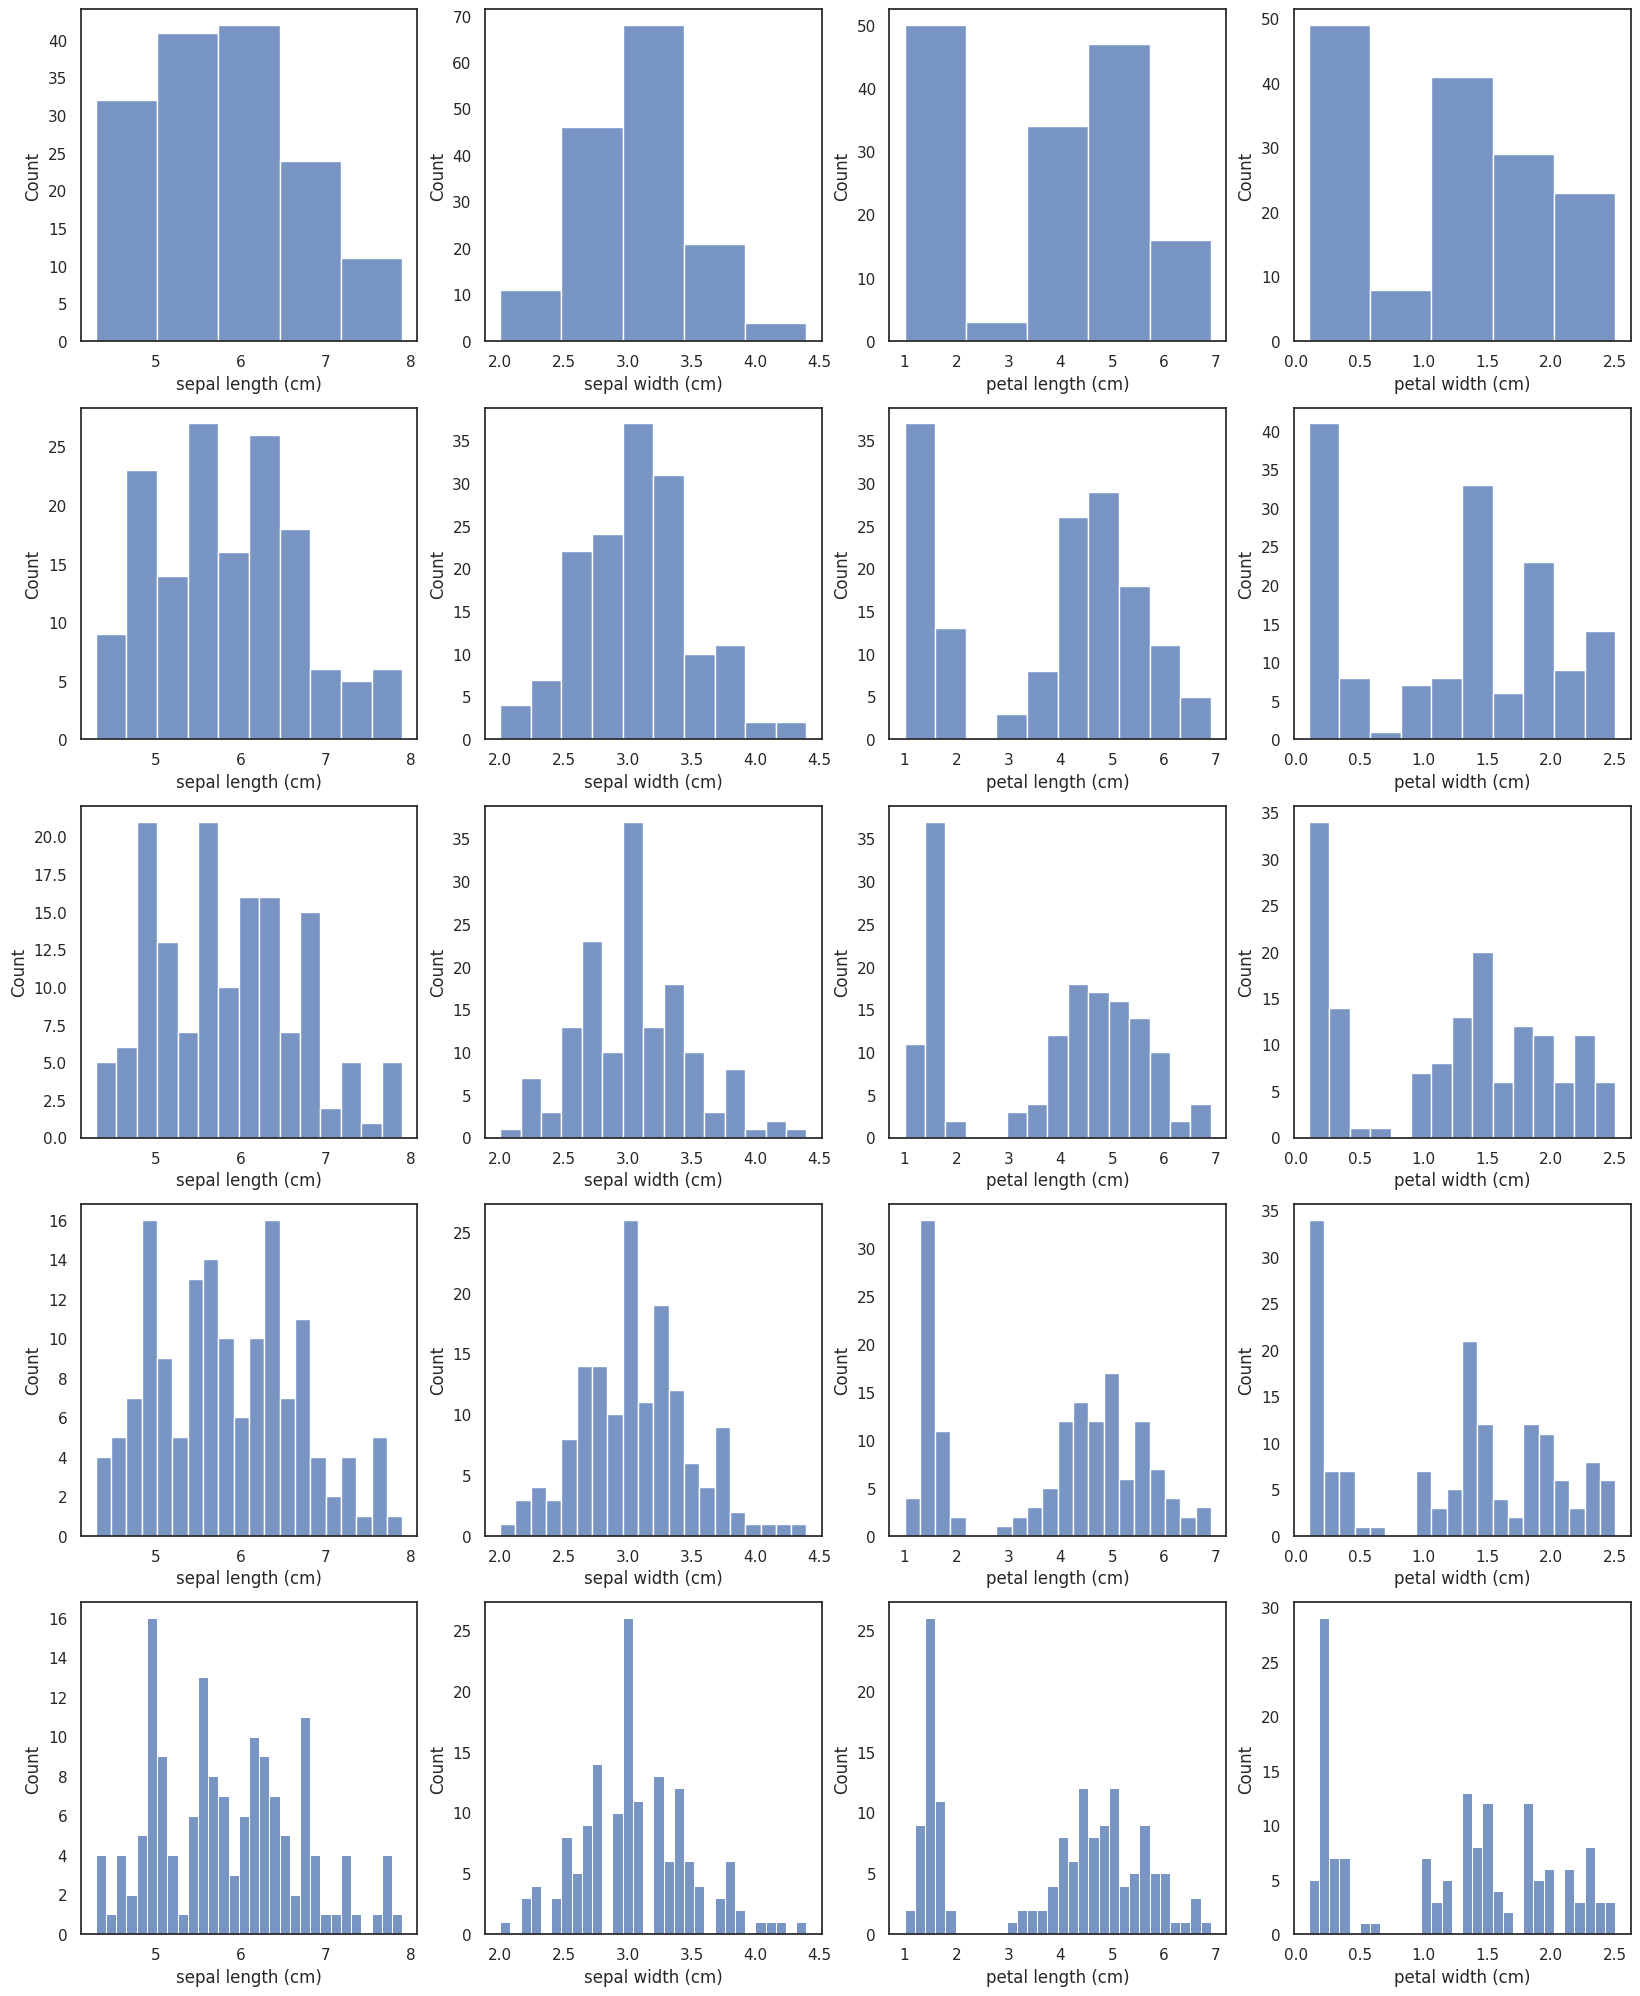

In [33]:
bins = [5, 10, 15, 20, 30]
fig, axs = plt.subplots(
    len(bins),
    len(df.columns[:-1]),
    figsize=(20, 5*len(bins)))
for k in range(len(bins)):
  for i, column in enumerate(df.columns[:-1]):
      sns.histplot(
          df,
          x=column,
          bins=bins[k],
          ax=axs[k][i])

#### 1.6.2. Сделайте на каждой гистограмме разделение по цвету согласно классу. Проведите это в двух режимах, когда гистограммы накладываются/суммируются и когда пересекаются.

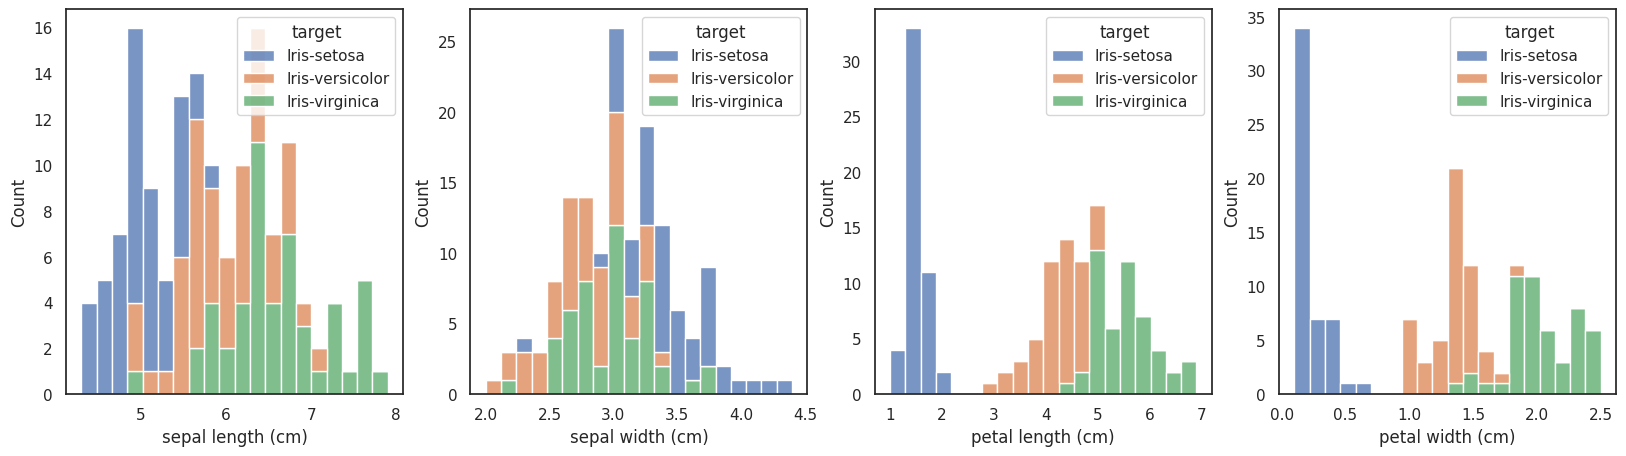

In [34]:
fig, axs = plt.subplots(1, len(df.columns[:-1]), figsize=(20, 5))
for i, column in enumerate(df.columns[:-1]):
    sns.histplot(df, x=column, hue="target", bins=20, ax=axs[i],
                 multiple="stack")

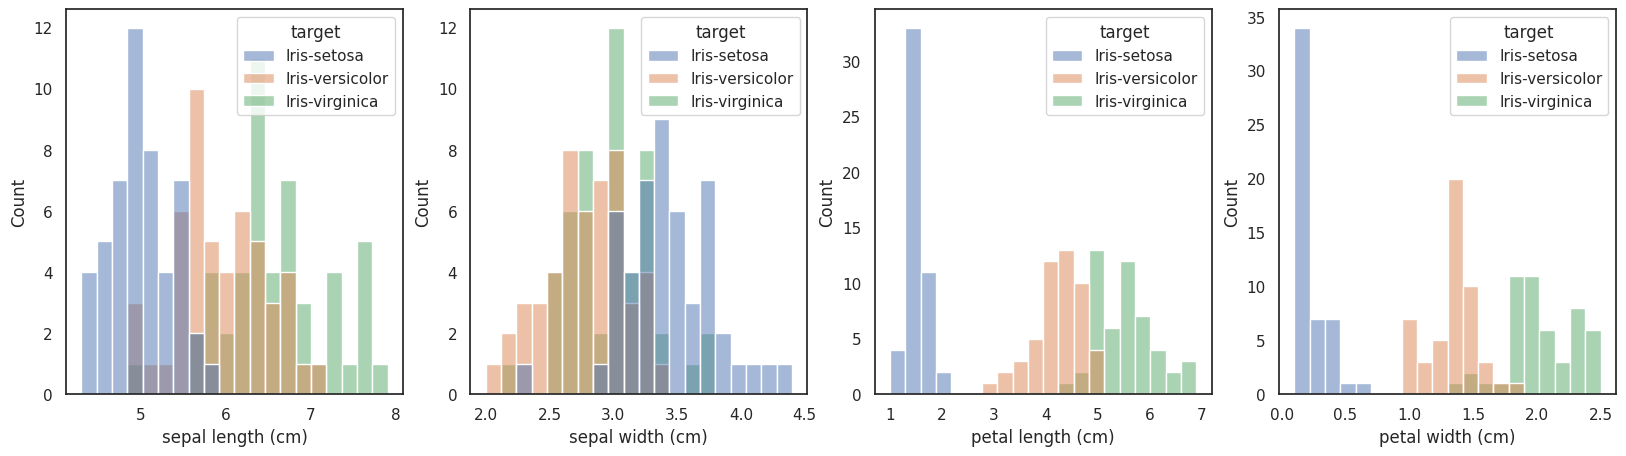

In [35]:
fig, axs = plt.subplots(1, len(df.columns[:-1]), figsize=(20, 5))
for i, column in enumerate(df.columns[:-1]):
    sns.histplot(df, x=column, hue="target", bins=20, ax=axs[i])

#### 1.6.3. Постройте гистограммы, чтобы вместо столбцов изображались ступеньки.

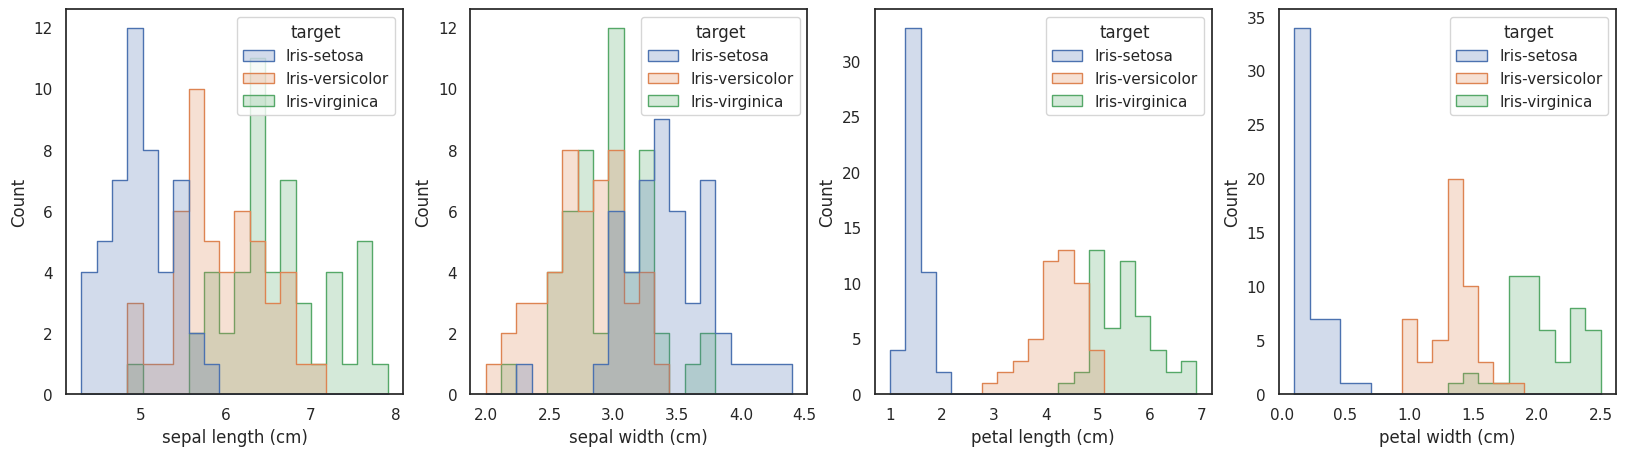

In [36]:
fig, axs = plt.subplots(1, len(df.columns[:-1]), figsize=(20, 5))
for i, column in enumerate(df.columns[:-1]):
    sns.histplot(df, x=column, hue="target", bins=20, ax=axs[i],
                 element="step")

#### 1.6.4. Добавьте на гистограммы график ядерной оценки плотности.

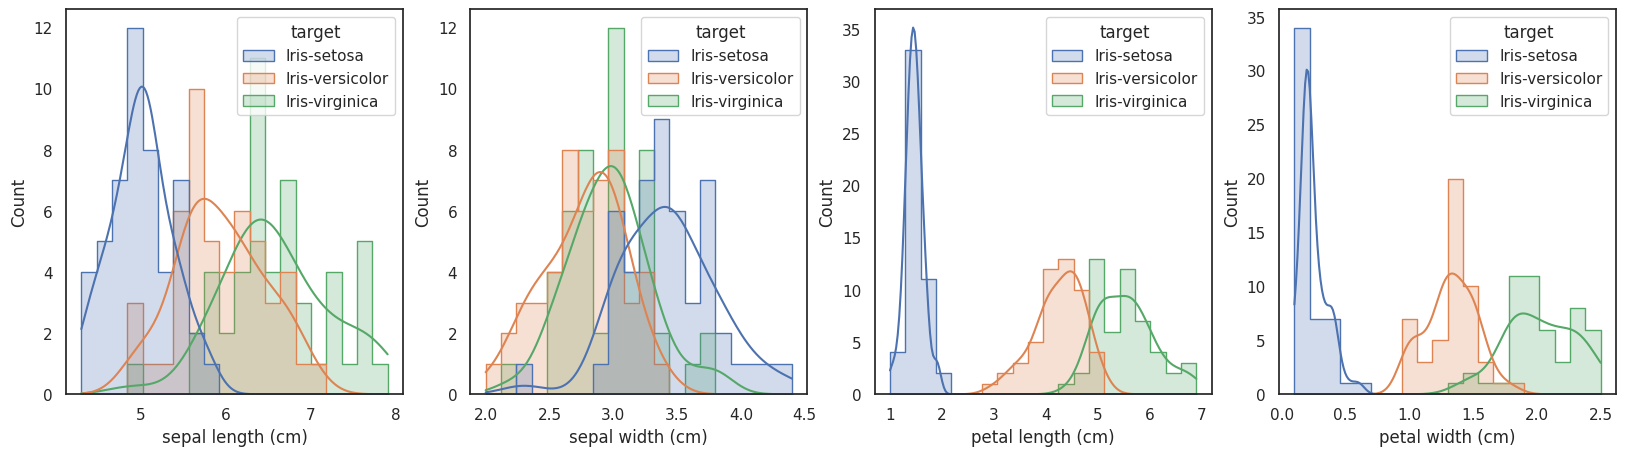

In [37]:
fig, axs = plt.subplots(1, len(df.columns[:-1]), figsize=(20, 5))
for i, column in enumerate(df.columns[:-1]):
    sns.histplot(df, x=column, hue="target", bins=20,
                 ax=axs[i], kde=True, element="step")

## 2. Изучение набора данных iris.csv с использованием NumPy

### 2.1. Загрузите данные из файла как массив NumPy.

In [38]:
df_arr = np.genfromtxt("iris.csv",
                       delimiter=",", dtype=float, filling_values=0,
                       names=True, usecols=(1, 2, 3, 4, 5))

### 2.2. Выведите первые 10 наблюдений набора данных.

In [39]:
df_arr[:10]

array([(5.1, 3.5, 1.4, 0.2, 0.), (4.9, 3. , 1.4, 0.2, 0.),
       (4.7, 3.2, 1.3, 0.2, 0.), (4.6, 3.1, 1.5, 0.2, 0.),
       (5. , 3.6, 1.4, 0.2, 0.), (5.4, 3.9, 1.7, 0.4, 0.),
       (4.6, 3.4, 1.4, 0.3, 0.), (5. , 3.4, 1.5, 0.2, 0.),
       (4.4, 2.9, 1.4, 0.2, 0.), (4.9, 3.1, 1.5, 0.1, 0.)],
      dtype=[('sepal_length_cm', '<f8'), ('sepal_width_cm', '<f8'), ('petal_length_cm', '<f8'), ('petal_width_cm', '<f8'), ('target', '<f8')])

### 2.3. Рассчитайте характеристики полученные методом describe в п. 1.3 с использованием методов NumPy.

In [40]:
numeric_data = df_arr.view((float, len(df_arr.dtype.names)))
print("\t"+ "\t".join(df_arr.dtype.names))
print("count\t" + "".join([f"{np.count_nonzero(~np.isnan(numeric_data[:, i:i+1])):.6f}\t"
                          for i in range(len(df_arr.dtype.names))]))
print("mean\t" + "".join([f"{np.mean(numeric_data[:, i:i+1]):.6f}\t"
                          for i in range(len(df_arr.dtype.names))]))
print("std\t" + "".join([f"{np.std(numeric_data[:, i:i+1]):.6f}\t"
                         for i in range(len(df_arr.dtype.names))]))
print("min\t" + "".join([f"{np.amin(numeric_data[:, i:i+1]):.6f}\t"
                         for i in range(len(df_arr.dtype.names))]))
print("25%\t" + "".join([f"{np.percentile(numeric_data[:, i:i+1], 25):.6f}\t"
                         for i in range(len(df_arr.dtype.names))]))
print("50%\t" + "".join([f"{np.percentile(numeric_data[:, i:i+1], 50):.6f}\t"
                         for i in range(len(df_arr.dtype.names))]))
print("75%\t" + "".join([f"{np.percentile(numeric_data[:, i:i+1], 75):.6f}\t"
                         for i in range(len(df_arr.dtype.names))]))
print("max\t" + "".join([f"{np.amax(numeric_data[:, i:i+1]):.6f}\t"
                         for i in range(len(df_arr.dtype.names))]))

	sepal_length_cm	sepal_width_cm	petal_length_cm	petal_width_cm	target
count	150.000000	150.000000	150.000000	150.000000	150.000000	
mean	5.843333	3.057333	3.758000	1.199333	1.000000	
std	0.825301	0.434411	1.759404	0.759693	0.816497	
min	4.300000	2.000000	1.000000	0.100000	0.000000	
25%	5.100000	2.800000	1.600000	0.300000	0.000000	
50%	5.800000	3.000000	4.350000	1.300000	1.000000	
75%	6.400000	3.300000	5.100000	1.800000	2.000000	
max	7.900000	4.400000	6.900000	2.500000	2.000000	


## 3. Изучение набора данных вашего варианта

### Оцените и опишите набор данных вашего варианта с использованием методов в п. 1

In [41]:
df_var1 = pd.read_csv("lab1_var1.csv")
df_var1.drop("Unnamed: 0", axis=1, inplace=True)

In [42]:
df_var1.head()

,first,second,third,fourth,label
0,0.342494,-4.170293,-0.427134,5.285126,0
1,2.506861,1.536588,3.311512,3.455109,1
2,-0.723178,-2.866860,-1.778395,3.604657,0
3,2.413882,3.921118,2.923352,2.768869,1
4,-0.377760,-2.471150,-2.796839,3.968686,0


In [43]:
df_var1.describe()

,first,second,third,fourth,label
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,-0.079295,0.056456,-0.078393,3.019419,0.500000
std,3.199506,3.026384,3.285926,1.055298,0.501255
min,-6.200980,-4.808300,-6.728692,0.523930,0.000000
25%,-3.150403,-2.655759,-3.176466,2.350288,0.000000
50%,0.708355,-0.549150,-0.120588,2.986238,0.500000
75%,2.775412,2.894577,2.872863,3.763799,1.000000
max,5.443596,5.361941,6.107679,6.353969,1.000000


In [44]:
df_var1.replace(
    {"label":
     {0: "Zero",
      1: "One"}},
     inplace=True)
df_var1.to_csv("new_lab1_var1.csv", index=False)

In [45]:
df_var1.head()

,first,second,third,fourth,label
0,0.342494,-4.170293,-0.427134,5.285126,Zero
1,2.506861,1.536588,3.311512,3.455109,One
2,-0.723178,-2.866860,-1.778395,3.604657,Zero
3,2.413882,3.921118,2.923352,2.768869,One
4,-0.377760,-2.471150,-2.796839,3.968686,Zero


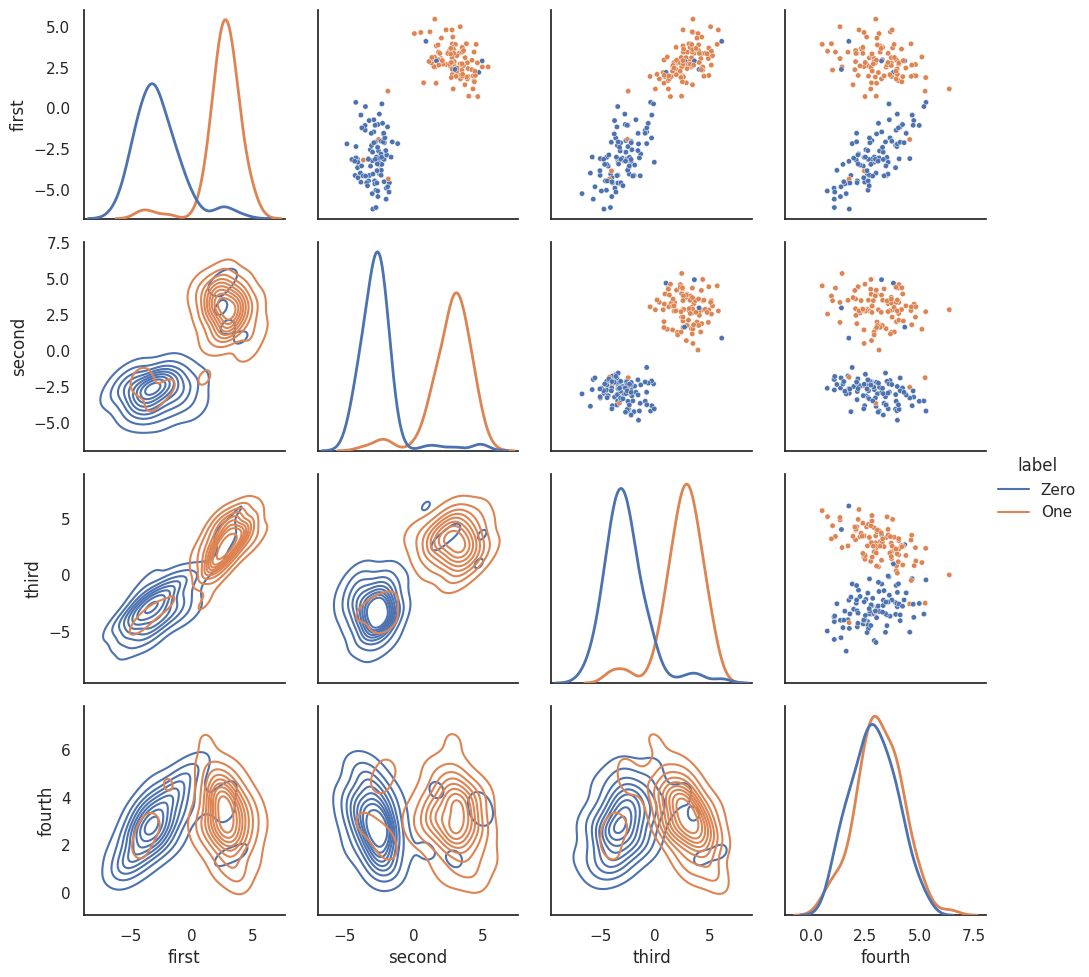

In [46]:
sns.set_theme(style="white")
sns.color_palette("tab10")

g = sns.PairGrid(df_var1, diag_sharey=False, hue="label")
g.map_upper(sns.scatterplot, s=15)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot, lw=2)
g.add_legend()

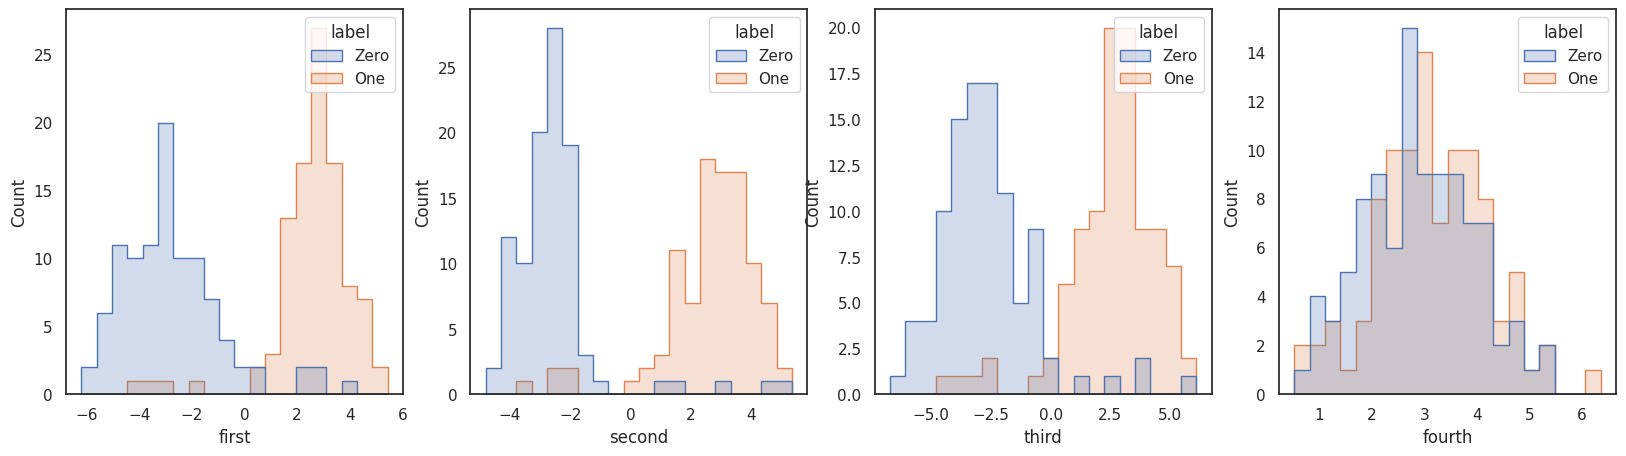

In [47]:
fig, axs = plt.subplots(1, len(df_var1.columns[:-1]), figsize=(20, 5))
for i, column in enumerate(df_var1.columns[:-1]):
    sns.histplot(df_var1, x=column, hue="label", bins=20, ax=axs[i], element="step")

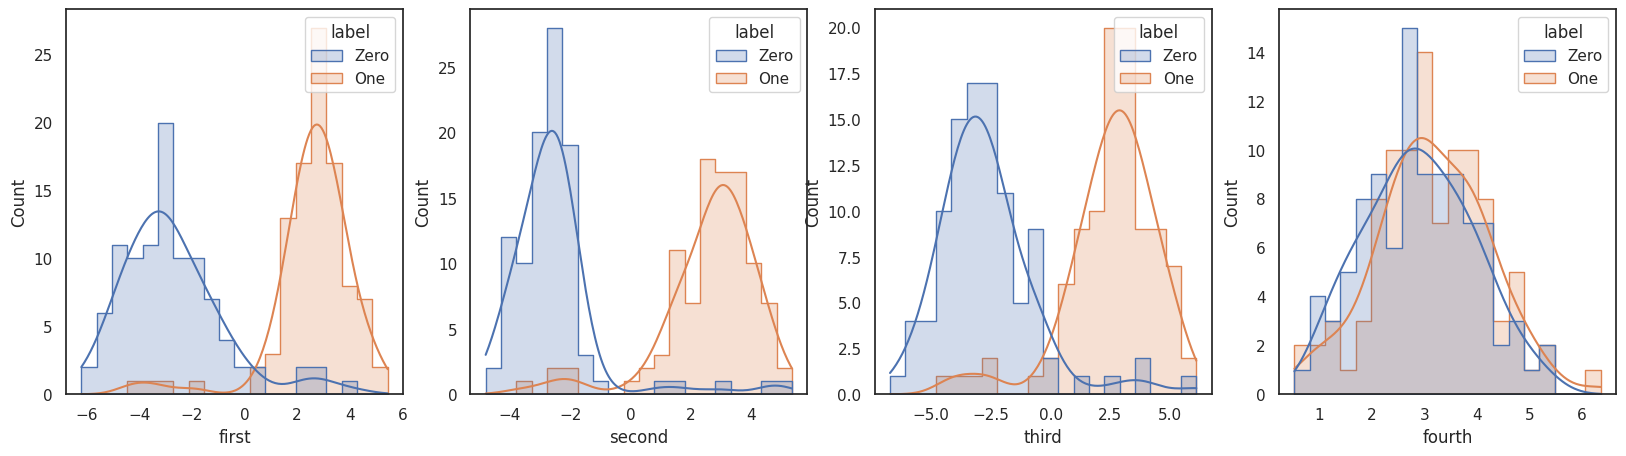

In [48]:
fig, axs = plt.subplots(1, len(df_var1.columns[:-1]), figsize=(20, 5))
for i, column in enumerate(df_var1.columns[:-1]):
    sns.histplot(df_var1, x=column, hue="label", bins=20, ax=axs[i], kde=True, element="step")

## 4. Преобразование данных

### 4.1. Получите из датафрейма из п. 1.4 столбец с названием классов. Используя LabelEncoder и OneHotEncoder получите различные способы кодирования меток класса. В чем различия полученных кодировок?

In [49]:
new_df = pd.read_csv("new_iris.csv")

le = LabelEncoder()
new_df["target"] = le.fit_transform(new_df["target"])
new_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [50]:
new_df = pd.read_csv("new_iris.csv")

ohe = OneHotEncoder()
ohe_df = pd.DataFrame(ohe.fit_transform(new_df[["target"]]).toarray())
new_df.drop("target", axis=1, inplace=True)
new_df = pd.concat([new_df, ohe_df], axis=1)
new_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),0,1,2
0,5.1,3.5,1.4,0.2,1.0,0.0,0.0
1,4.9,3.0,1.4,0.2,1.0,0.0,0.0
2,4.7,3.2,1.3,0.2,1.0,0.0,0.0
3,4.6,3.1,1.5,0.2,1.0,0.0,0.0
4,5.0,3.6,1.4,0.2,1.0,0.0,0.0
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0.0,0.0,1.0
146,6.3,2.5,5.0,1.9,0.0,0.0,1.0
147,6.5,3.0,5.2,2.0,0.0,0.0,1.0
148,6.2,3.4,5.4,2.3,0.0,0.0,1.0


### 4.2. Для датафрейма из п. 1.4, получите все столбцы признаков (столбцы не содержащие метки классов). Преобразуйте полученные столбцы в массив NumPy.

In [51]:
attributes = ["sepal length (cm)", "sepal width (cm)", "petal length (cm)", "petal width (cm)"]
data = new_df[attributes].to_numpy()
data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

### 4.3. Для массива NumPy из п. 4.2 примените StandardScaler, MinMaxScaler, MaxAbsScaler и RobustScaler. Для каждого из результатов постройте гистограммы по каждому признаку без разделения по классам. В чем различия между такими преобразованиями данных?

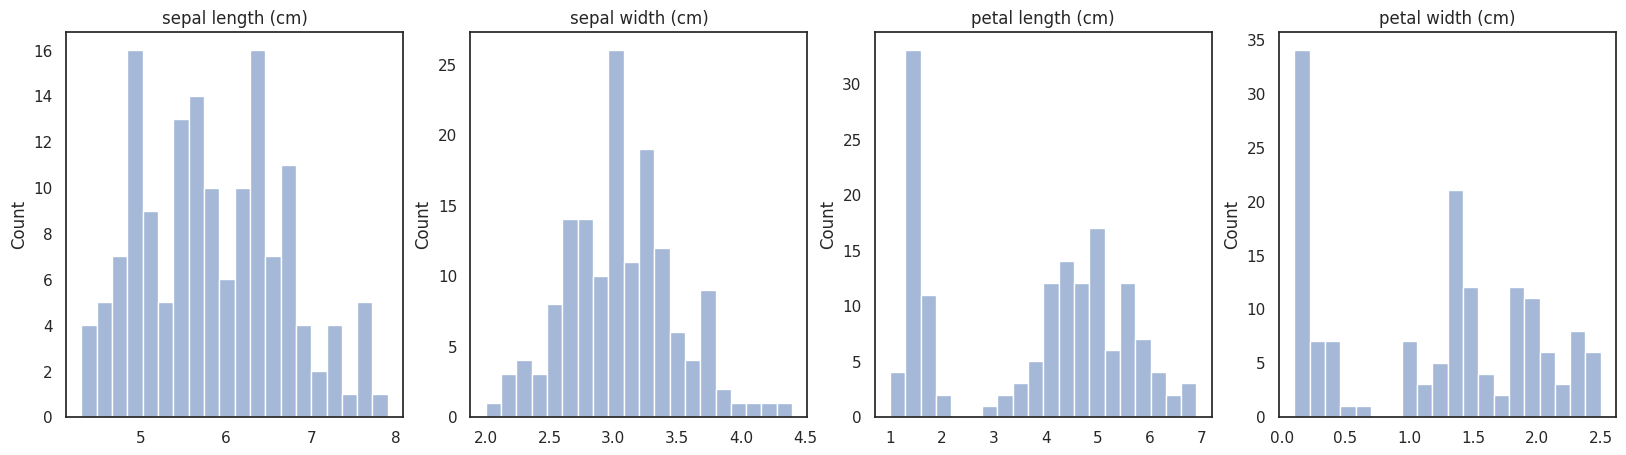

In [52]:
fig, axs = plt.subplots(1, data.shape[1], figsize=(20, 5))
for i in range(data.shape[1]):
    sns.histplot(data[:, i:i+1], bins=20, ax=axs[i], legend=False).set(title=attributes[i])

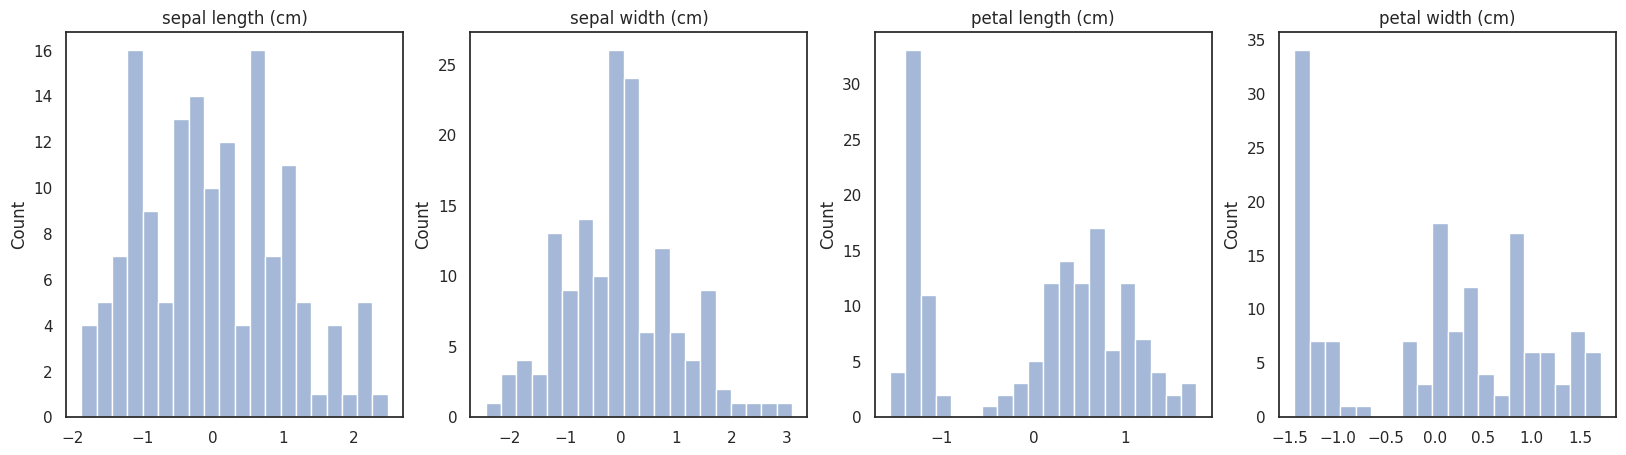

In [53]:
scaler = StandardScaler()
scale_data = scaler.fit_transform(data)

fig, axs = plt.subplots(1, scale_data.shape[1], figsize=(20, 5))
for i in range(scale_data.shape[1]):
    sns.histplot(scale_data[:, i:i+1], bins=20,ax=axs[i], legend=False).set(title=attributes[i])

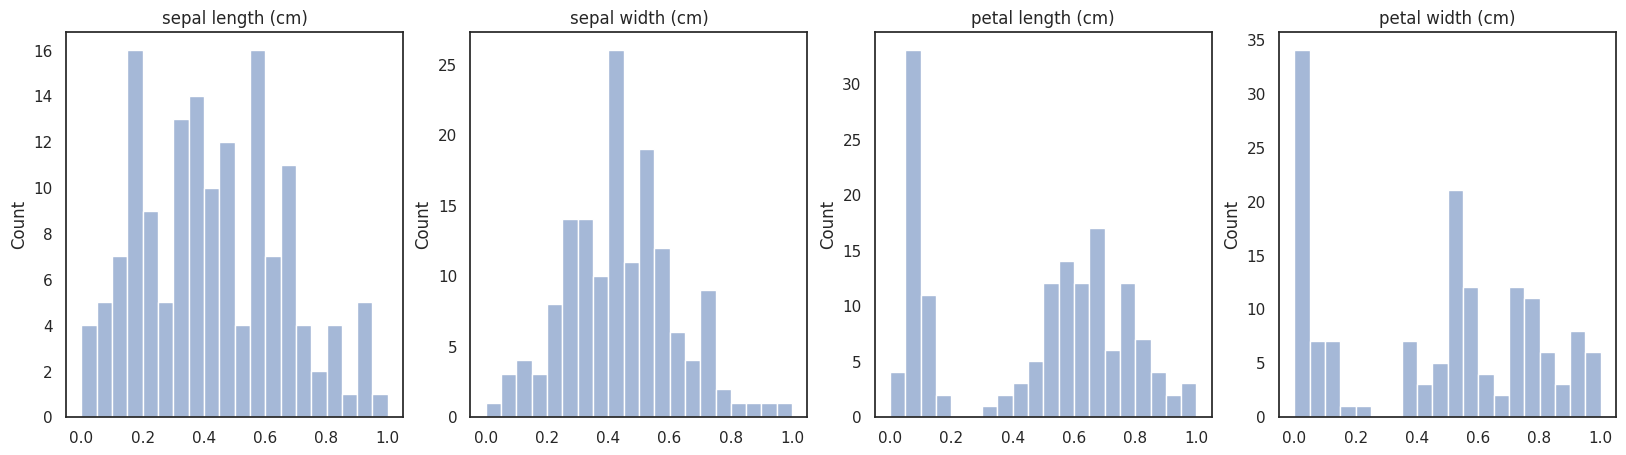

In [54]:
scaler = MinMaxScaler()
scale_data = scaler.fit_transform(data)

fig, axs = plt.subplots(1, scale_data.shape[1], figsize=(20, 5))
for i in range(scale_data.shape[1]):
    sns.histplot(scale_data[:, i:i+1], bins=20, ax=axs[i], legend=False).set(title=attributes[i])

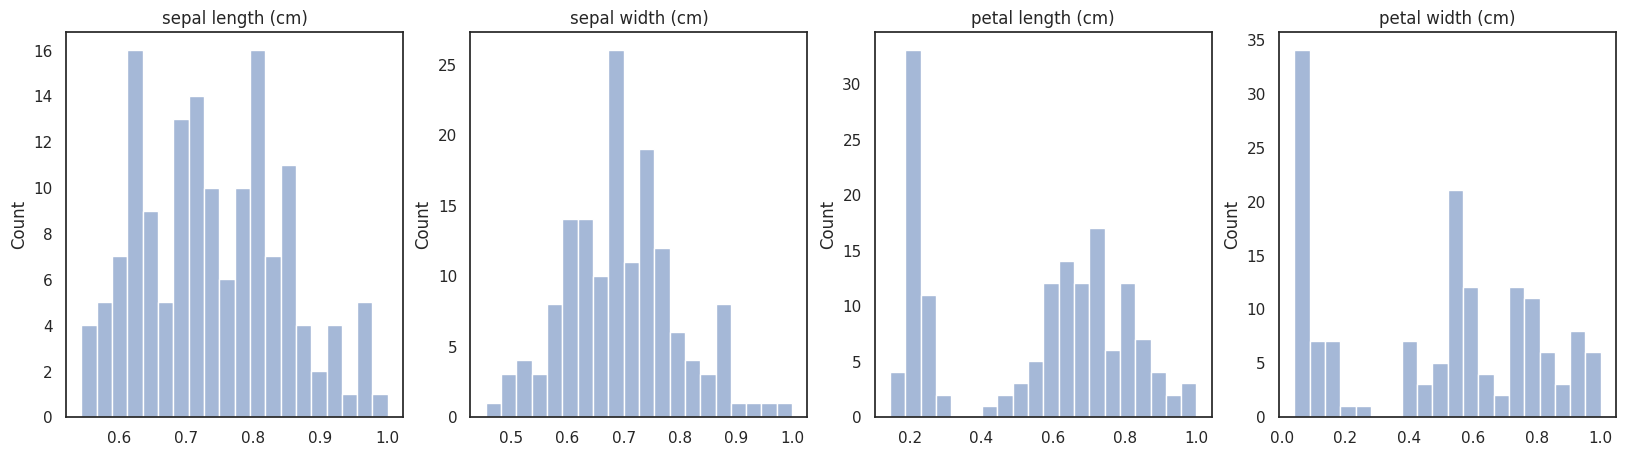

In [55]:
scaler = MaxAbsScaler()
scale_data = scaler.fit_transform(data)

fig, axs = plt.subplots(1, scale_data.shape[1], figsize=(20, 5))
for i in range(scale_data.shape[1]):
    sns.histplot(scale_data[:, i:i+1], bins=20, ax=axs[i], legend=False).set(title=attributes[i])

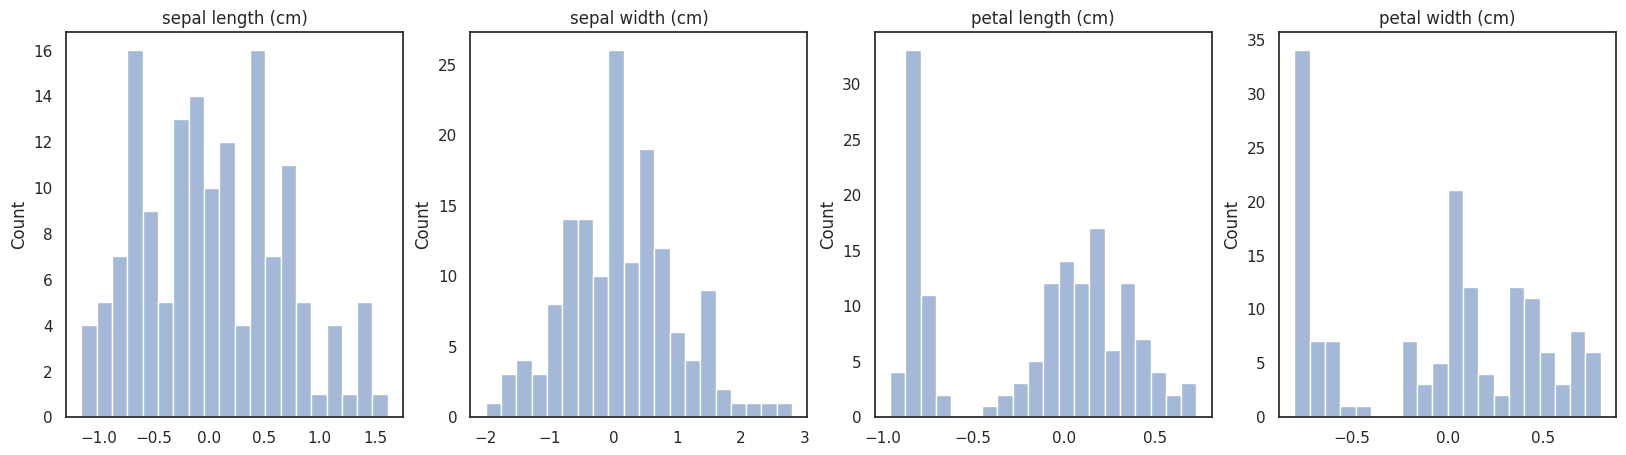

In [56]:
scaler = RobustScaler()
scale_data = scaler.fit_transform(data)

fig, axs = plt.subplots(1, scale_data.shape[1], figsize=(20, 5))
for i in range(scale_data.shape[1]):
    sns.histplot(scale_data[:, i:i+1], bins=20, ax=axs[i], legend=False).set(title=attributes[i])

 ### 4.4. Согласно варианту, самостоятельно реализуйте StandardScaler или MinMaxScaler с использованием NumPy. Проверьте корректность работы на вашем наборе данных, сравните результаты между вашей реализацией и реализацией из Sklearn, а также рассчитав минимальное, максимальное, среднее значение и дисперсию, после преобразования.

In [57]:
df_arr_var1 = np.genfromtxt("lab1_var1.csv",
                       delimiter=",",
                       dtype=float,
                       filling_values=0,
                       skip_header=1,
                       usecols=(1, 2, 3, 4)
                       )

In [58]:
def MyMinMaxScaler(dataframe, feature_min, feature_max):
  dataframe_scaled = np.zeros(dataframe.shape)
  for i in range(dataframe.shape[1]):
    current_column = dataframe[:, i]
    dataframe_std = (dataframe - min(current_column)) / (max(current_column) - min(current_column))
    column_scaled = dataframe_std[:, i] * (feature_max - feature_min) + feature_min
    dataframe_scaled[:, i] = column_scaled
  return dataframe_scaled

In [59]:
scaler = MinMaxScaler()
scale_data_sk = scaler.fit_transform(df_arr_var1)
scale_data_my = MyMinMaxScaler(df_arr_var1, 0, 1)

Результат Sklearn:

In [ ]:
scale_data_sk

Мой результат:

In [ ]:
scale_data_my

In [62]:
print("min\t" + "".join([f"{np.amin(scale_data_my[:, i:i+1]):.6f}\t" for i in range(len(scale_data_my[0]))]))
print("max\t" + "".join([f"{np.amax(scale_data_my[:, i:i+1]):.6f}\t" for i in range(len(scale_data_my[0]))]))
print("mean\t" + "".join([f"{np.mean(scale_data_my[:, i:i+1]):.6f}\t" for i in range(len(scale_data_my[0]))]))
print("var\t" + "".join([f"{np.var(scale_data_my[:, i:i+1]):.6f}\t" for i in range(len(scale_data_my[0]))]))

min	0.000000	0.000000	0.000000	0.000000	
max	1.000000	1.000000	1.000000	1.000000	
mean	0.525711	0.478332	0.518082	0.428040	
var	0.075118	0.088107	0.065201	0.032601	


### 4.5. Для датафрейма из п. 1.4  получите новый, который содержит только классы Iris-versicolor и Iris-virginica, признаки “sepal length (cm)” и “petal length (cm)”, и наблюдения, для которых значения признака “sepal width (cm)” лежат между квантилями 25% и 75%.

In [65]:
new_df = pd.read_csv("new_iris.csv")
new_df = new_df[(new_df["target"] == "Iris-versicolor") | (new_df["target"] == "Iris-virginica")]
new_df = new_df[["sepal length (cm)", "sepal width (cm)", "petal length (cm)"]]
new_df = new_df[(new_df["sepal width (cm)"] >= new_df["sepal width (cm)"].quantile(0.25)) & (new_df["sepal width (cm)"] <= new_df["sepal width (cm)"].quantile(0.75))]
new_df

,sepal length (cm),sepal width (cm),petal length (cm)
54,6.5,2.8,4.6
55,5.7,2.8,4.5
58,6.6,2.9,4.6
59,5.2,2.7,3.9
61,5.9,3.0,4.2
63,6.1,2.9,4.7
64,5.6,2.9,3.6
66,5.6,3.0,4.5
67,5.8,2.7,4.1
71,6.1,2.8,4.0


## 5. Понижение размерности

### 5.1. Для набора данных iris.csv примените понижение размерности до 2, используя PCA и TSNE из Sklearn. Для каждого из результатов постройте диаграмму рассеяния с выделением разным цветом наблюдений разных классов.

In [66]:
df = pd.read_csv("iris.csv")
df.drop("Unnamed: 0", axis=1, inplace=True)

<Axes: xlabel='first', ylabel='second'>

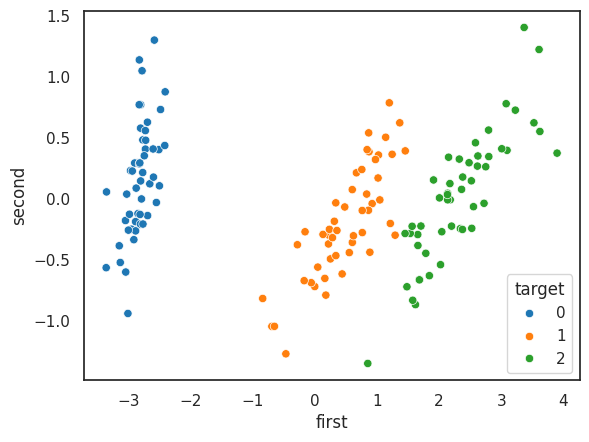

In [67]:
pca = PCA(n_components=2)
new_df_pca = pca.fit_transform(df)
new_df_pca = pd.DataFrame(new_df_pca, columns=["first", "second"])
new_df_pca.insert(loc=new_df_pca.shape[1], column="target", value=df["target"])
sns.scatterplot(new_df_pca, x="first", y="second", hue="target", palette='tab10')

<Axes: xlabel='first', ylabel='second'>

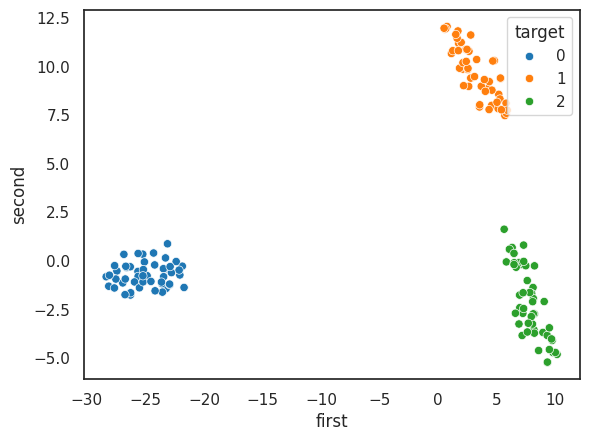

In [68]:
tsne = TSNE(n_components=2)
new_df_tsne = tsne.fit_transform(df)
new_df_tsne = pd.DataFrame(new_df_tsne, columns=["first", "second"])
new_df_tsne.insert(loc=new_df_tsne.shape[1], column="target", value=df["target"])
sns.scatterplot(new_df_tsne, x="first", y="second", hue="target", palette='tab10')